In [1]:
"""Code by Elisa Negrini for Threshold Dynamics"""

import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage



def generate_dumbbell_indicator(x, y, width, height, circle_radius, center_x, center_y, spacing):
    """
    Generates the indicator function of a dumbbell shape.

    Args:
        x (float): x-coordinate of the point.
        y (float): y-coordinate of the point.
        width (float): width of the dumbbell.
        height (float): height of the dumbbell.
        circle_radius (float): radius of the circles.
        center_x (float): x-coordinate of the center of the dumbbell.
        center_y (float): y-coordinate of the center of the dumbbell.
        spacing (float): spacing between the circles and the rectangle.

    Returns:
        int: 1 if the point (x, y) is inside the dumbbell, 0 otherwise.
    """
    dist_to_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    dist_to_top_circle = np.sqrt((x - center_x) ** 2 + (y - center_y + (height / 2 - circle_radius - spacing)) ** 2)
    dist_to_bottom_circle = np.sqrt((x - center_x) ** 2 + (y - center_y - (height / 2 - circle_radius - spacing)) ** 2)

    if (
        (np.abs(x - center_x) <= width / 2 and np.abs(y - center_y) <= height / 2) or
        (dist_to_top_circle <= circle_radius) or
        (dist_to_bottom_circle <= circle_radius)
    ):
        return 1
    else:
        return 0

def generate_dumbbell_img(width, height, circle_radius, center_x, center_y, spacing, resolution=100):
    """
    Plots the indicator function of a dumbbell shape as an image.

    Args:
        width (float): width of the dumbbell.
        height (float): height of the dumbbell.
        circle_radius (float): radius of the circles.
        center_x (float): x-coordinate of the center of the dumbbell.
        center_y (float): y-coordinate of the center of the dumbbell.
        spacing (float): spacing between the circles and the rectangle.
        resolution (int): number of points along each axis to generate the image.
                          Higher values result in a smoother image. (default: 100)
    """
    x = np.linspace(center_x - width / 2 - circle_radius - spacing, center_x + width / 2 + circle_radius + spacing, resolution)
    y = np.linspace(center_y - height / 2 - circle_radius - spacing, center_y + height / 2 + circle_radius + spacing, resolution)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X, dtype=int)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = generate_dumbbell_indicator(X[i, j], Y[i, j], width, height, circle_radius, center_x, center_y, spacing)
    
    return Z



/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [62]:
def generate_circle_indicator(x, y, radius, center_x, center_y):
    """
    Generates the indicator function of a circle shape.

    Args:
        x (float): x-coordinate of the point.
        y (float): y-coordinate of the point.
        radius (float): radius of the circle.
        center_x (float): x-coordinate of the center of the circle.
        center_y (float): y-coordinate of the center of the circle.

    Returns:
        int: 1 if the point (x, y) is inside the circle, 0 otherwise.
    """
    dist_to_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)

    if dist_to_center <= radius:
        return 1
    else:
        return 0


def generate_circle_img(radius, center_x, center_y, resolution=100):
    """
    Plots the indicator function of a circle shape as an image.

    Args:
        radius (float): radius of the circle.
        center_x (float): x-coordinate of the center of the circle.
        center_y (float): y-coordinate of the center of the circle.
        resolution (int): number of points along each axis to generate the image.
                          Higher values result in a smoother image. (default: 100)
    """
    x = np.linspace(-10, 10, resolution)
    y = np.linspace(-10, 10, resolution)
    X, Y = np.meshgrid(x, y)
    print(X.shape)

    Z = np.zeros_like(X, dtype=int)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = generate_circle_indicator(X[i, j], Y[i, j], radius, center_x, center_y)
    return Z


In [63]:
def convolve_with_gaussian(Z, kernel_dim, mean, std):
    """
    Convolves the input image with a Gaussian kernel of given dimension and properties.

    Args:
        Z (ndarray): Input image.
        kernel_dim (int): Dimension of the square Gaussian kernel.
        mean (float): Mean of the Gaussian kernel.
        std (float): Standard deviation of the Gaussian kernel.

    Returns:
        ndarray: Convolved image.
    """
    kernel = np.exp(-((np.arange(kernel_dim) - kernel_dim // 2) ** 2) / (2 * std ** 2))
    kernel /= np.sum(kernel)
    convolved_image = ndimage.convolve(Z, kernel[np.newaxis, :] * kernel[:, np.newaxis], mode='reflect')

    return convolved_image

def convolve_with_kernel(Z, kernel):
    """
    Convolves the input image with a given kernel.

    Args:
        Z (ndarray): Input image.
        kernel (ndarray): Convolution kernel.

    Returns:
        ndarray: Convolved image.
    """
    convolved_image = ndimage.convolve(Z, kernel, mode='reflect')

    return convolved_image

In [64]:
def threshold_image(image, threshold):
    """
    Sets all elements in the image less than the given threshold to zero.

    Args:
        image (ndarray): Input image.
        threshold (float): Threshold value.

    Returns:
        ndarray: Thresholded image.
    """
    thresholded_image = np.where(image < threshold, 0, image)
    thresholded_image = np.where(thresholded_image > threshold, 1, thresholded_image)
    return thresholded_image

In [76]:
# Convolution parameters
kernel_dim = 20 # Dimension of the square Gaussian kernel
mean = 80  # Mean of the Gaussian kernel
std =5.0  # Standard deviation of the Gaussian kernel
# kernel_gaussian_blur = np.array([[1, 2, 1],
#                                  [2, 4, 2],
#                                  [1, 2, 1]]) /8

kernel_box_blur = np.ones((3, 3)) 

#Threshold
threshold=0.5

def create_elliptical_kernel(radius_x, radius_y):
    """
    Creates an elliptical kernel with given X and Y radii.

    Args:
        radius_x (int): X radius of the ellipse.
        radius_y (int): Y radius of the ellipse.

    Returns:
        ndarray: Elliptical kernel.
    """
    kernel = np.zeros((radius_y * 2 + 1, radius_x * 2 + 1))
    center_x = radius_x
    center_y = radius_y

    for i in range(radius_y * 2 + 1):
        for j in range(radius_x * 2 + 1):
            if ((j - center_x) / radius_x) ** 2 + ((i - center_y) / radius_y) ** 2 <= 1:
                kernel[i, j] = 1

    return kernel

kernel_rand =2  * np.random.rand(6, 6)

(200, 200)
(200, 200)


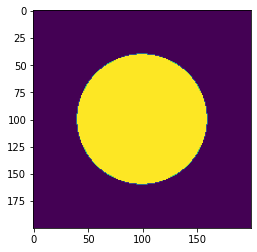

In [77]:
# Generate the indicator function of the circle
# Z = generate_dumbbell_img(width=1.0, height=2.0, circle_radius=1, center_x=0.0, center_y=4.0, spacing=1.5, resolution=200)
Z = generate_circle_img(radius=6, center_x=0., center_y=0.0, resolution=200)
print(Z.shape)
plt.figure()
plt.imshow(Z)
# generate_dumbbell_img(width=1.0, height=2.0, circle_radius=1, center_x=0.0, center_y=4.0, spacing=1.5, resolution=200)

# Set the number of iterations
num_iterations = 40

# Create a list of images
images = []
for it in range(num_iterations):
    # Apply convolution to the indicator function
    images.append(Z)
    # Convolve the image with a Gaussian kernel
    convolved_Z = convolve_with_gaussian(Z.astype(float), kernel_dim, mean, std)
#     convolved_Z = convolve_with_kernel(Z.astype(float), kernel_rand)
    # Threshold the convolved image
    thresholded_image = threshold_image(convolved_Z, threshold)
    # Update the image for the next iteration
    Z = thresholded_image

In [78]:
for i, image in enumerate(images):
    filename = f"images/image_{i}.png"
    plt.figure()
    plt.imshow(images[i])
    plt.savefig(filename)
    plt.close()

In [79]:
frames = []
for t in range(len(images)):
    image = imageio.v2.imread(f'images/image_{t}.png')
    frames.append(image)

In [80]:
imageio.mimsave('./circle.gif', frames, duration = 50) 